In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()

In [3]:
data.data.shape

(569, 30)

In [4]:
data.target.shape

(569,)

In [5]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [6]:
tree_depth4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_depth4.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree_depth4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_depth4.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree_depth4, out_file="tree.dot", class_names=["malignant","benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [8]:
print("Feature importances:\n{}".format(tree_depth4.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [9]:
from matplotlib import pyplot as plt

In [10]:
def plot_feature_importances_cancer(model):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

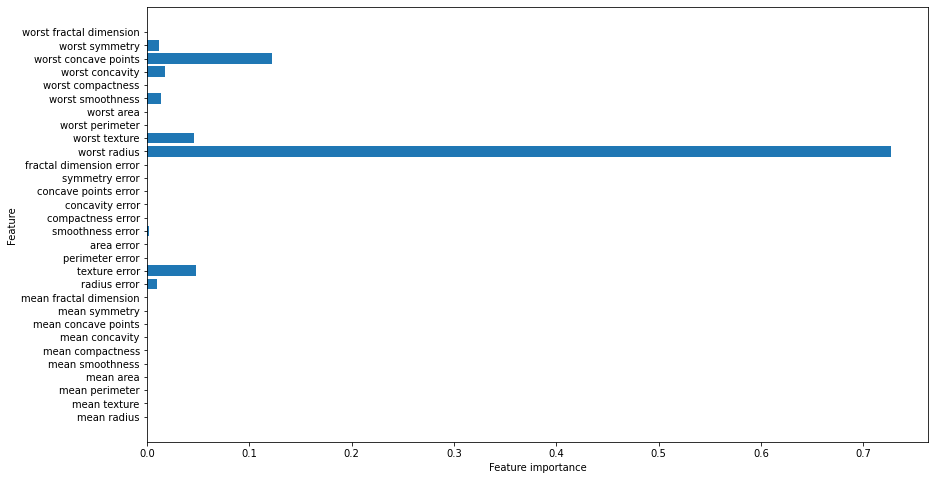

In [11]:
plt.figure(figsize=(14, 8))

plot_feature_importances_cancer(tree_depth4)